In [1]:
import os
import networkx as nx
import pydotplus
import matplotlib.pyplot as plt
import itertools

In [2]:
command = """
read_verilog counter.v
proc; opt; fsm; opt; memory; opt
techmap; opt
dfflibmap -liberty cmos_cells.lib
abc -liberty cmos_cells.lib
splitnets -ports; opt
read_liberty -lib cmos_cells.lib
show -format png -prefix counter
show -format dot -prefix counter
"""
os.system('yosys -p "%s"' % command)

0

![counter](counter.png)

In [3]:
os.system('sed -i "s/:[^ ]*//g" counter.dot')

0

In [4]:
with open('counter.dot') as f:
    s = f.read()
g = pydotplus.parser.parse_dot_data(s)
G = nx.nx_pydot.from_pydot(g)

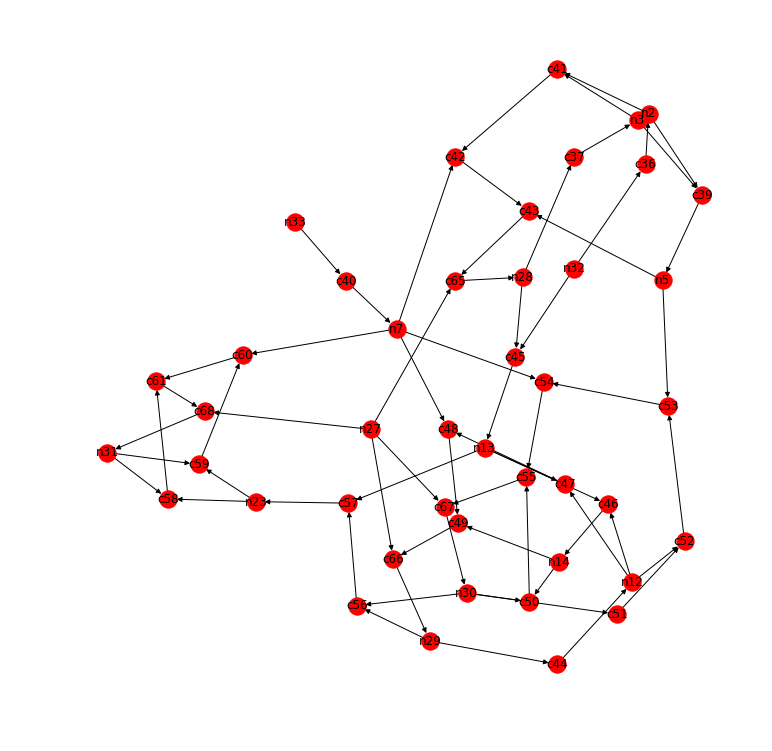

In [5]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G, with_labels=True)

In [6]:
# nodes with diamond or point shapes are internal nets
remove = [x for x in G.nodes if G.node[x]['shape'] in ('diamond','point')]
remove

['n23', 'n2', 'n12', 'n5', 'n3', 'n14', 'n7', 'n13']

In [7]:
for node in remove:
    # reroute around each target node
    new_edges = itertools.product(G.predecessors(node), G.successors(node))
    G.add_edges_from(new_edges)
# delete target nodes
G.remove_nodes_from(remove)

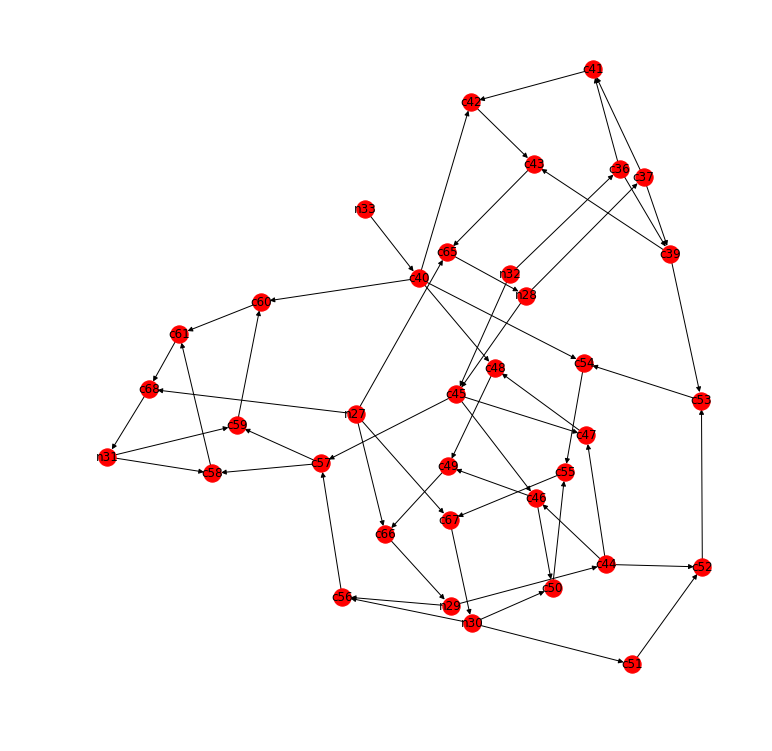

In [8]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G, with_labels=True)

In [9]:
# simple cycles in the directed graph show cyclical paths
c1 = list(nx.simple_cycles(G))
(c1, len(c1))

([['c39', 'c43', 'c65', 'n28', 'c37'],
  ['c43', 'c65', 'n28', 'c37', 'c41', 'c42'],
  ['c49', 'c66', 'n29', 'c44', 'c46'],
  ['c49', 'c66', 'n29', 'c44', 'c47', 'c48'],
  ['c52', 'c53', 'c54', 'c55', 'c67', 'n30', 'c51'],
  ['n30', 'c50', 'c55', 'c67'],
  ['c59', 'c60', 'c61', 'c68', 'n31'],
  ['c58', 'c61', 'c68', 'n31']],
 8)

In [10]:
G2 = nx.Graph(G.to_undirected())

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


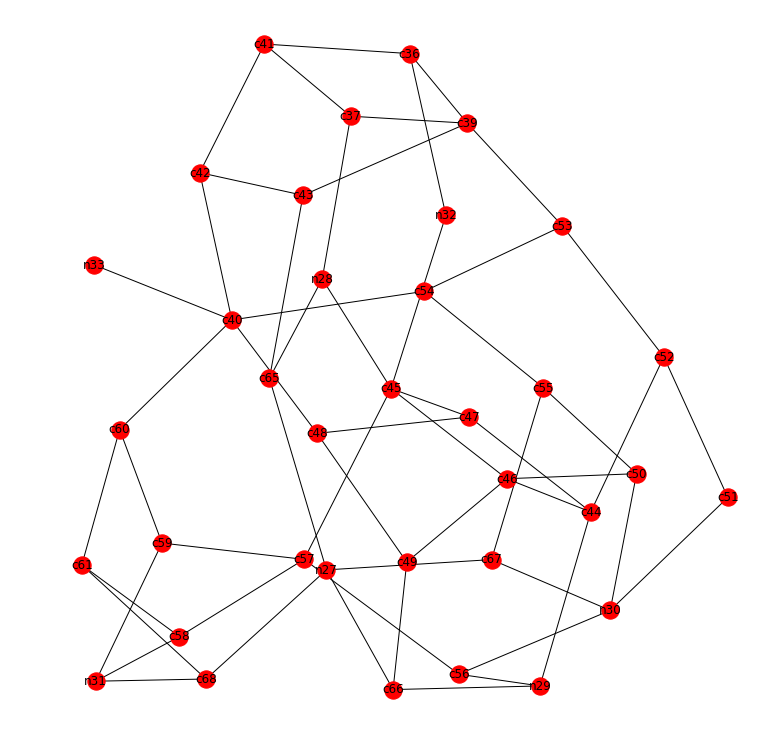

In [11]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G2, with_labels=True)

In [12]:
# cycle basis in undirected graph shows both cyclical and reconvergent paths
c2 = nx.cycle_basis(G2)
(c2, len(c2))

([['n28', 'c45', 'n32', 'c36', 'c39', 'c43', 'c65'],
  ['c46', 'c45', 'n32', 'c36', 'c39', 'c43', 'c65', 'n27', 'c66', 'c49'],
  ['c48',
   'c47',
   'c45',
   'n32',
   'c36',
   'c39',
   'c43',
   'c65',
   'n27',
   'c66',
   'c49'],
  ['c46', 'c44', 'c47', 'c45'],
  ['n29',
   'c44',
   'c47',
   'c45',
   'n32',
   'c36',
   'c39',
   'c43',
   'c65',
   'n27',
   'c66'],
  ['c53', 'c52', 'c44', 'c47', 'c45', 'n32', 'c36', 'c39'],
  ['c67',
   'n30',
   'c51',
   'c52',
   'c44',
   'c47',
   'c45',
   'n32',
   'c36',
   'c39',
   'c43',
   'c65',
   'n27'],
  ['n29', 'c56', 'n30', 'c51', 'c52', 'c44'],
  ['c57', 'c56', 'n30', 'c51', 'c52', 'c44', 'c47', 'c45'],
  ['c46', 'c50', 'n30', 'c51', 'c52', 'c44'],
  ['c67', 'c55', 'c50', 'n30'],
  ['c53', 'c54', 'c55', 'c50', 'n30', 'c51', 'c52'],
  ['c48', 'c40', 'c54', 'c55', 'c50', 'n30', 'c51', 'c52', 'c44', 'c47'],
  ['c42',
   'c40',
   'c54',
   'c55',
   'c50',
   'n30',
   'c51',
   'c52',
   'c44',
   'c47',
   'c45',
   'n32

In [13]:
G2.number_of_nodes(), G2.number_of_edges()

(36, 57)

In [14]:
# edge list for exporting to SAT solver
list(G2.edges())

[('c49', 'c48'),
 ('c49', 'c46'),
 ('c49', 'c66'),
 ('c46', 'c50'),
 ('c46', 'c45'),
 ('c46', 'c44'),
 ('n33', 'c40'),
 ('c39', 'c53'),
 ('c39', 'c43'),
 ('c39', 'c37'),
 ('c39', 'c36'),
 ('c40', 'c60'),
 ('c40', 'c48'),
 ('c40', 'c54'),
 ('c40', 'c42'),
 ('c55', 'c50'),
 ('c55', 'c54'),
 ('c55', 'c67'),
 ('c56', 'n30'),
 ('c56', 'n29'),
 ('c56', 'c57'),
 ('c36', 'c41'),
 ('c36', 'n32'),
 ('n30', 'c50'),
 ('n30', 'c51'),
 ('n30', 'c67'),
 ('c66', 'n29'),
 ('c66', 'n27'),
 ('c58', 'n31'),
 ('c58', 'c57'),
 ('c58', 'c61'),
 ('c45', 'n28'),
 ('c45', 'c57'),
 ('c45', 'c47'),
 ('c45', 'n32'),
 ('c53', 'c52'),
 ('c53', 'c54'),
 ('n31', 'c59'),
 ('n31', 'c68'),
 ('n29', 'c44'),
 ('c41', 'c37'),
 ('c41', 'c42'),
 ('c65', 'n28'),
 ('c65', 'n27'),
 ('c65', 'c43'),
 ('c59', 'c60'),
 ('c59', 'c57'),
 ('c52', 'c51'),
 ('c52', 'c44'),
 ('c43', 'c42'),
 ('c60', 'c61'),
 ('n28', 'c37'),
 ('c47', 'c44'),
 ('c47', 'c48'),
 ('c68', 'n27'),
 ('c68', 'c61'),
 ('c67', 'n27')]